#1. TensorFlow 2 quickstart for beginners

In [0]:
%tensorflow_version 2.x
from __future__ import absolute_import, division, print_function, unicode_literals
# the future module is actually used for python 2.x 
import tensorflow as tf

TensorFlow 2.x selected.


In [0]:
# Load and prepare the MNIST dataset
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Convert the samples from integers to floating-point numbers
x_train, x_test = x_train / 255.0, x_test / 255.0

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
# Build the tf.keras.Sequential model by stacking layers. 
# Choose an optimizer and loss function for training.
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Flatten(input_shape=(28, 28)),
                                    tf.keras.layers.Dense(128, activation='relu'),
                                    tf.keras.layers.Dropout(0.2),
                                    tf.keras.layers.Dense(10)
])
# The Flatten layer is a utility layer that flattens an input of shape n * c * h * w to a simple vector output of shape n * (c*h*w)

In [0]:
# For each example the model returns a vector of 'logits' or 'log-odds' scores, one for each class. 
predictions = model(x_train[:1]).numpy()
predictions


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



array([[ 0.32489306,  0.48646927, -0.28705427, -0.04187691,  0.5686884 ,
        -1.0200717 ,  0.20477997,  0.06824523, -0.17434219, -0.07253088]],
      dtype=float32)

In [0]:
# The tf.nn.softmax function converts these logits to probabilities for each class:
tf.nn.softmax(predictions).numpy()
# It is possible to bake this softmax in as the activation function for the last layer of the network. While this can make the model output more directly interpretable, this approach is
# discouraged as it's impossible to provide an exact and numerically stable loss calculation for all models when using a softmax output. 

array([[0.12679476, 0.14902975, 0.06876002, 0.08786484, 0.16180065,
        0.03303623, 0.11244415, 0.09809357, 0.07696375, 0.0852123 ]],
      dtype=float32)

In [0]:
# The losses.SparseCategoricalCrossentropy loss takes a vector of logits and a True index and returns a scalar loss for each example
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
loss_fn(y_train[:1], predictions).numpy()

3.4101505

In [0]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 6s 96us/sample - loss: 0.2952 - accuracy: 0.9132
Epoch 2/5
60000/60000 [==============================] - 5s 85us/sample - loss: 0.1427 - accuracy: 0.9573
Epoch 3/5
60000/60000 [==============================] - 5s 80us/sample - loss: 0.1071 - accuracy: 0.9674
Epoch 4/5
60000/60000 [==============================] - 5s 79us/sample - loss: 0.0897 - accuracy: 0.9726
Epoch 5/5
60000/60000 [==============================] - 5s 79us/sample - loss: 0.0751 - accuracy: 0.9763


#2: Basic classification: Classify images of clothing

In [0]:
%tensorflow_version 2.x
# keras is a high-level API to build and train models in TensorFlow.
from __future__ import absolute_import, division, print_function, unicode_literals
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

TensorFlow 2.x selected.
2.1.0


In [0]:
# Import the Fashion MNIST dataset
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
# change the class name for better understanding
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

##2.1. Explore the data

In [0]:
# Explore the data
train_images.shape

(60000, 28, 28)

In [0]:
len(train_labels)

60000

In [0]:
test_images.shape

(10000, 28, 28)

In [0]:
len(test_labels)

10000

In [0]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

##2.2. Preprocess the data

All the data must be preprocessed before training the network.

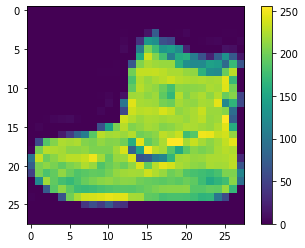

In [0]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
train_images = train_images / 255.0
test_images = test_images / 255.0

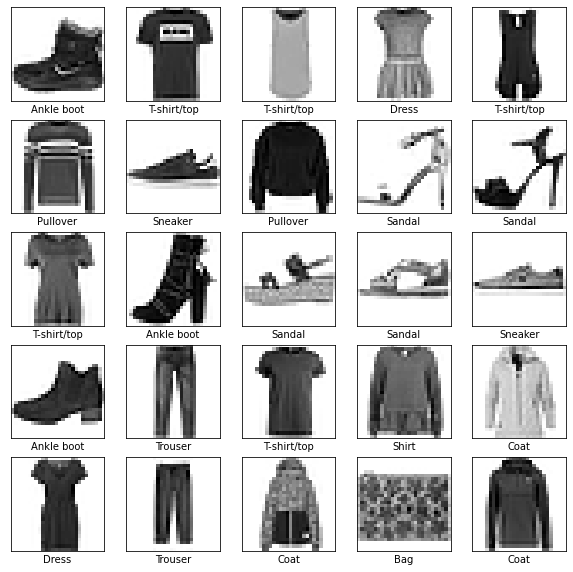

In [0]:
plt.figure(figsize=(10, 10))
for i in range(25):
  plt.subplot(5, 5, i+1) # nrow, ncol, index, which starts with 1
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

##2.3. Build the model

In [0]:
# The basic building block of a neural network is the layer. Layers extract representations from the data fed into them.
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28, 28)),
                          keras.layers.Dense(128, activation='relu'),
                          keras.layers.Dense(10)
])
# The Flatten layer transforms the format of the images from a two-dimensional array to a one-dimensional array. 
# This layer has no parameters to learn, it only reformats the data. 
# Dense layer or fully connected neural layers. 

##2.4. Compile the model

*   Loss function
*   Optimizer
*   Metrics

In [0]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
# Use this cross-entropy loss when there are two or more label classes, which is provided as integers.
# Using CategoricalCrossentropy loss for one-hot representation. 
# from_logits: whether y_pred is expected to be a logits tensor. By default, we assume that y_pred encodes a probability distribution. 
# Note: Using from_logits=True may be more numerically stable. 
# logits: a tensor with the unscaled log probabilities used to predict the labels with sigmoid(logits) --> raw prediction which should be passed through normalization function

##2.5. Train the model

In [0]:
# Feed the model
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 8s 134us/sample - loss: 0.4965 - accuracy: 0.8255
Epoch 2/10
60000/60000 [==============================] - 6s 100us/sample - loss: 0.3726 - accuracy: 0.8658
Epoch 3/10
60000/60000 [==============================] - 7s 119us/sample - loss: 0.3351 - accuracy: 0.8776
Epoch 4/10
60000/60000 [==============================] - 6s 108us/sample - loss: 0.3101 - accuracy: 0.8863
Epoch 5/10
60000/60000 [==============================] - 7s 114us/sample - loss: 0.2939 - accuracy: 0.8910
Epoch 6/10
60000/60000 [==============================] - 6s 99us/sample - loss: 0.2778 - accuracy: 0.8961
Epoch 7/10
60000/60000 [==============================] - 10s 163us/sample - loss: 0.2671 - accuracy: 0.9008
Epoch 8/10
60000/60000 [==============================] - 7s 114us/sample - loss: 0.2567 - accuracy: 0.9048
Epoch 9/10
60000/60000 [==============================] - 6s 98us/sample - loss: 0.2460 - accuracy: 0.9076
Epoch 

In [0]:
# Evaluate accuracy
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=1)
print('\nTest accuracy: ', test_acc)
"""
It turns out that the accuracy on the test dataset is a little less than the accuracy on the training dataset.
This gap between training accuracy and test accuracy represents overfitting. 
Overfitting happens when a machine learning model performs worse on new, previously unseen inputs than it does on the training data. 
An overfitted model memorizes the noise and details in the training dataset to a point where it negatively impacts the performance of the model on the new data. 
"""

10000/10000 [==============================] - 0s 38us/sample - loss: 0.3321 - accuracy: 0.8849

Test accuracy:  0.8849


In [0]:
# Make predictions
# Attach a softmax layer to convert the logits to probabilities
probability_model = tf.keras.Sequential([
                                         model, 
                                         tf.keras.layers.Softmax()
])

In [0]:
predictions = probability_model.predict(test_images)
predictions[0]

[3.9186245e-09 1.1383749e-12 2.1984570e-11 1.5919868e-11 1.1910933e-10
 1.7662028e-04 7.5281186e-09 5.3018662e-03 2.2814535e-09 9.9452150e-01]


In [0]:
# without normalization
model.predict(test_images)[0]

array([-12.440703 , -20.584597 , -17.623857 , -17.94663  , -15.934155 ,
        -1.7246853, -11.787799 ,   1.6771265, -12.981629 ,   6.9113293],
      dtype=float32)

In [0]:
np.argmax(predictions[0])
# the postion of the max

9

In [0]:
test_labels[0]

9

In [0]:
# Graph this to look at the full set of 10 class predictions
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel('{} {:2.0f}% ({})'.format(class_names[predicted_label],
                                       100*np.max(predictions_array),
                                       class_names[true_label]),
             color=color)
  
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color='#777777')
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

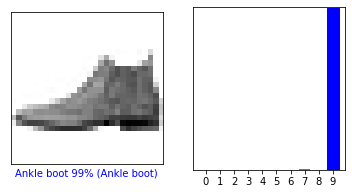

In [0]:
i = 0
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

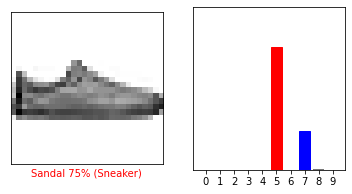

In [0]:
i = 12
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

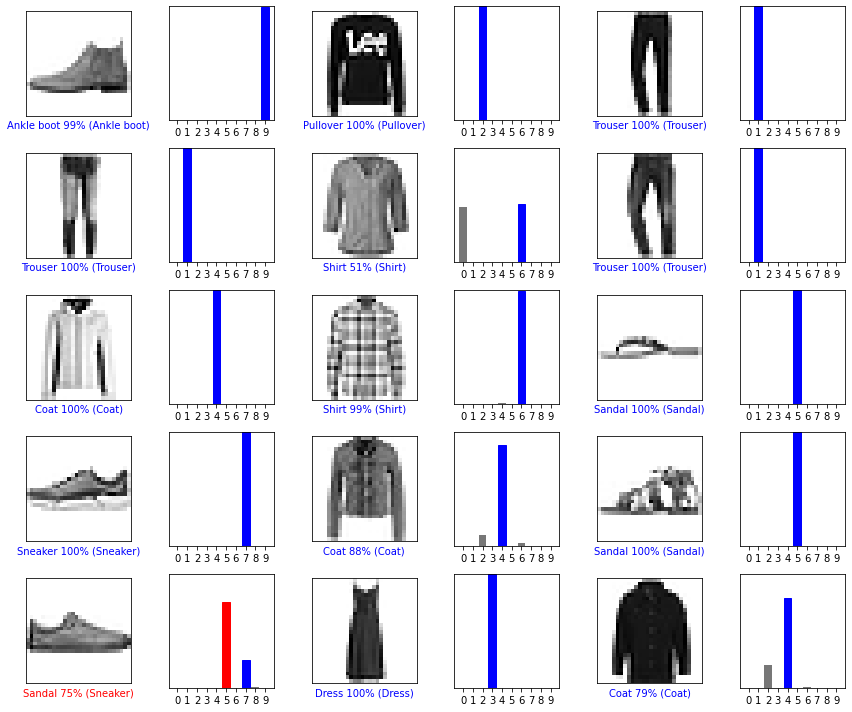

In [0]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

##2.6. Use the trained model

In [0]:
# Grab an image from the test dataset
img = test_images[1]
img.shape

(28, 28)

In [0]:
# tf.keras models are optimized to make predictions on a batch, or collection, of examples at once. 
# Accordingly, even though you're using a single image, you need to add it to a list. 

# Add the image to a batch where it's the only member.
img = (np.expand_dims(img, 0))
img.shape

(1, 28, 28)

In [0]:
# Now predict the correct label for this image.
predictions_single = probability_model.predict(img)
predictions_single

array([[9.7867098e-07, 3.1535799e-14, 9.9983704e-01, 1.7983132e-10,
        1.5258143e-04, 3.1641736e-13, 9.4136585e-06, 7.7963915e-18,
        1.2140738e-09, 5.6859678e-20]], dtype=float32)

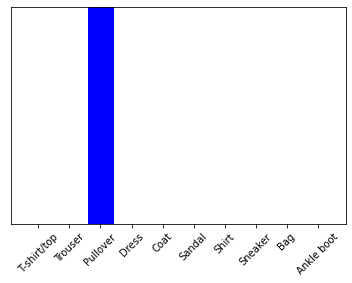

In [0]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [0]:
np.argmax(predictions_single[0])

2

#3. Text classification with TensorFlow Hub: Movie Reviews

In [0]:
# TensorFlow Hub is a library to reuse the model for transfer learning tasks
%tensorflow_version 2.x
from __future__ import absolute_import, division, print_function, unicode_literals
import numpy as np
import tensorflow as tf

!pip install -q tensorflow-hub
!pip install -q tfds-nightly
import tensorflow_hub as hub
import tensorflow_datasets as tfds

print('Version: ', tf.__version__)
print('Eager mode:', tf.executing_eagerly())
print('Hub version:', hub.__version__)
print('GPU is', "available" if tf.config.experimental.list_physical_devices('GPU') else 'NOT AVAILABLE')

TensorFlow 2.x selected.
Version:  2.2.0-rc1
Eager mode: True
Hub version: 0.7.0
GPU is NOT AVAILABLE


##3.1. Download the IMDB dataset

In [0]:
# Split the training set into 60% and 40%, so we'll end up with 15,000 exapmles for training, 
# 10,000 examples for validation and 25,000 examples for testing. 
train_data, validation_data, test_data = tfds.load(
    name='imdb_reviews',
    split=('train[:60%]', 'train[60%:]', 'test'),
    as_supervised=True
)

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteIFCDQ3/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteIFCDQ3/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteIFCDQ3/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


##3.2. Explore the data

In [0]:
# Each example is a sentence representing the movie review and a corresponding label
train_examples_batch, train_labels_batch = next(iter(train_data.batch(10)))
train_examples_batch

<tf.Tensor: shape=(10,), dtype=string, numpy=
array([b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.",
       b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell 

In [0]:
train_labels_batch

<tf.Tensor: shape=(10,), dtype=int64, numpy=array([0, 0, 0, 1, 1, 1, 0, 0, 0, 0])>

##3.3. Build the model

three main architectural decisions:
1. How to represent the text?
2. How many layers to use in the model?
3. How many hidden units to use for each layer?

In [0]:
# One way to represent the text is to convert sentences into embeddings vectors. 
# We can use a pre-trained text embedding as the first layer, which will have three advantages:
# don't have to worry about text preprocessing
# benefit from transfer learning
# the embedding has a fixed size, wo it's simpler to process

embedding = 'https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1'
hub_layer = hub.KerasLayer(embedding, input_shape=[], dtype=tf.string, trainable=True)
hub_layer(train_examples_batch[:3])

<tf.Tensor: shape=(3, 20), dtype=float32, numpy=
array([[ 1.765786  , -3.882232  ,  3.9134233 , -1.5557289 , -3.3362343 ,
        -1.7357955 , -1.9954445 ,  1.2989551 ,  5.081598  , -1.1041286 ,
        -2.0503852 , -0.72675157, -0.65675956,  0.24436149, -3.7208383 ,
         2.0954835 ,  2.2969332 , -2.0689783 , -2.9489717 , -1.1315987 ],
       [ 1.8804485 , -2.5852382 ,  3.4066997 ,  1.0982676 , -4.056685  ,
        -4.891284  , -2.785554  ,  1.3874227 ,  3.8476458 , -0.9256538 ,
        -1.896706  ,  1.2113281 ,  0.11474707,  0.76209456, -4.8791065 ,
         2.906149  ,  4.7087674 , -2.3652055 , -3.5015898 , -1.6390051 ],
       [ 0.71152234, -0.6353217 ,  1.7385626 , -1.1168286 , -0.5451594 ,
        -1.1808156 ,  0.09504455,  1.4653089 ,  0.66059524,  0.79308075,
        -2.2268345 ,  0.07446612, -1.4075904 , -0.70645386, -1.907037  ,
         1.4419787 ,  1.9551861 , -0.42660055, -2.8022065 ,  0.43727064]],
      dtype=float32)>

In [0]:
# build the full model
model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1))

model.summary()
# 1. The first layer is a TensorFlow Hub layer. This layer uses a pre-trained Saved Model to map a sentence into its embedding vector.
# 2. This fixed-length output vector is piped through a fully-connected layer with 16 hidden units.
# 3. The last layer is densely connected with a single output node. Using the sigmoid activation function.

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 20)                400020    
_________________________________________________________________
dense (Dense)                (None, 16)                336       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 400,373
Trainable params: 400,373
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Loss function and optimizer
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

##3.4. Train the model

In [0]:
# Train the model for 20 epochs in mini-batches of 512 samples. 
# While training, monitor the model's loss and accuracy on the 10,000 samples from the validation set
history = model.fit(train_data.shuffle(10000).batch(512),
                    epochs=20,
                    validation_data=validation_data.batch(512),
                    verbose=1)
# dataset.shuffle(buffer_size=3) will allocate a buffer of size 3 for picking random entries. 
# This buffer will be connected to the source dataset. 
# For example:
# <- shuffle <- source
# <- [1, 2, 3] <- [4, 5, 6]
# 2 <- [1, 3, 4] <- [5, 6]
# 1 <- [3, 4, 5] <- [6]
# 3 <- [4, 5, 6] <- []
# 5 <- [4, 6] <- []
# 6 <- [4] <- []
# 4 <- [] <- []

Epoch 1/20
30/30 [==============================] - 3s 108ms/step - loss: 1.1848 - accuracy: 0.4458 - val_loss: 0.8257 - val_accuracy: 0.4842
Epoch 2/20
30/30 [==============================] - 3s 102ms/step - loss: 0.7659 - accuracy: 0.5091 - val_loss: 0.7077 - val_accuracy: 0.5424
Epoch 3/20
30/30 [==============================] - 3s 102ms/step - loss: 0.6766 - accuracy: 0.5686 - val_loss: 0.6599 - val_accuracy: 0.5929
Epoch 4/20
30/30 [==============================] - 3s 100ms/step - loss: 0.6352 - accuracy: 0.6079 - val_loss: 0.6292 - val_accuracy: 0.6219
Epoch 5/20
30/30 [==============================] - 3s 102ms/step - loss: 0.6031 - accuracy: 0.6487 - val_loss: 0.6020 - val_accuracy: 0.6532
Epoch 6/20
30/30 [==============================] - 3s 104ms/step - loss: 0.5716 - accuracy: 0.6765 - val_loss: 0.5755 - val_accuracy: 0.6705
Epoch 7/20
30/30 [==============================] - 3s 104ms/step - loss: 0.5407 - accuracy: 0.7095 - val_loss: 0.5481 - val_accuracy: 0.7165
Epoch 

##3.5. Evaluate the model

In [0]:
results = model.evaluate(test_data.batch(512), verbose=2)
for name, value in zip(model.metrics_names, results):
  print('%s: %.3f'%(name, value))

49/49 - 3s - loss: 0.3314 - accuracy: 0.8494
loss: 0.331
accuracy: 0.849


#4. Text classification with preprocessed text: Movie reviews

In [0]:
%tensorflow_version 2.x
from __future__ import absolute_import, division, print_function, unicode_literals
try:
  !pip install -q tf-nightly
except Exception:
  pass
import tensorflow as tf
from tensorflow import keras
import tensorflow_datasets as tfds
tfds.disable_progress_bar()
import numpy as np
print(tf.__version__)

2.2.0-dev20200329


##4.1. Download the IMDB dataset

In [0]:
(train_data, test_data), info = tfds.load(
    # Use the version pre-encoded with an ~8k vocabulary.
    'imdb_reviews/subwords8k',
    # Return the train/test datasets as a tuple.
    split=(tfds.Split.TRAIN, tfds.Split.TEST),
    # Return (example, label) pairs from the dataset instead of a dictionary.
    as_supervised=True,
    # Also return the 'info' structure.
    with_info=True
)

##4.2. Try the encoder

In [0]:
# encoder: extract the representation from the original data to a tensor with features
encoder = info.features['text'].encoder
print('Vocabulary size: {}'.format(encoder.vocab_size))

Vocabulary size: 8185


In [0]:
sample_string = 'Hello TensorFlow.'
encoded_string = encoder.encode(sample_string)
print('Encoded string is {}'.format(encoded_string))

original_string = encoder.decode(encoded_string)
print('The original string: "{}"'.format(original_string))

assert original_string == sample_string
# The encoder encodes the string by breaking it into subwords or characters
# if the word is not in its dictionary. 
# So the more a string resembles the dataset,
# the shorter the encoded representation will be. 

Encoded string is [4025, 222, 6307, 2327, 4043, 2120, 7975]
The original string: "Hello TensorFlow."


In [0]:
for ts in encoded_string:
  print('{} -----> {}'.format(ts, encoder.decode([ts])))

4025 -----> Hell
222 -----> o 
6307 -----> Ten
2327 -----> sor
4043 -----> Fl
2120 -----> ow
7975 -----> .


#4.3. Explore the data

In [0]:
for train_example, train_label in train_data.take(1):
  print('Encoded text:', train_example[:10].numpy())
  print('Label:', train_label.numpy())
# 0 is a negative review, 1 is a positve review
encoder.decode(train_example)

Encoded text: [  62   18   41  604  927   65    3  644 7968   21]
Label: 0


"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it."

##4.4. Prepare the data for training

In [0]:
# The reviews are all different lengths, so use padded_batch to zero pad the sequences while batching
# the input elements to be batched may have different shapes, and this transformation will pad each component to the respective shape in padding_shapes
elements = [
            [1, 2],
            [3, 4, 5],
            [6, 7],
            [8]
]
A = tf.data.Dataset.from_generator(lambda: iter(elements), tf.int32)
# Pad to the smallest per-batch size that fits all elements
B = A.padded_batch(2, padded_shapes=[None])
for element in B.as_numpy_iterator():
  print(element)

# Pad to a fixed size
C = A.padded_batch(2, padded_shapes=3)
for element in C.as_numpy_iterator():
  print(element)

# Pad with a custom value
D = A.padded_batch(2, padded_shapes=3, padding_values=-1)
for element in D.as_numpy_iterator():
  print(element)

# Components of nested elements can be padded independently
elements = [
            ([1, 2, 3], [10]),
            ([4, 5], [11, 12])
]
dataset = tf.data.Dataset.from_generator(
    lambda: iter(elements), (tf.int32, tf.int32)
)
# Pad the first component of the tuple to length 4, and the second component to the smallest size that fits.
dataset = dataset.padded_batch(2, padded_shapes=([4], [None]), padding_values=(-1, 100))
print(list(dataset.as_numpy_iterator()))

[[1 2 0]
 [3 4 5]]
[[6 7]
 [8 0]]
[[1 2 0]
 [3 4 5]]
[[6 7 0]
 [8 0 0]]
[[ 1  2 -1]
 [ 3  4  5]]
[[ 6  7 -1]
 [ 8 -1 -1]]
[(array([[ 1,  2,  3, -1],
       [ 4,  5, -1, -1]], dtype=int32), array([[ 10, 100],
       [ 11,  12]], dtype=int32))]


In [0]:
BUFFER_SIZE = 1000
train_batches = (
    train_data.shuffle(BUFFER_SIZE).padded_batch(32, padded_shapes=([None], []))
)
test_batches = (
    test_data.padded_batch(32, padded_shapes=([None], []))
)
# Note: As of TensorFlow 2.2 the padded_shapes argument is no longer required. The default behavior is to pad all axes to the longest in the batch.

In [0]:
for example_batch, label_batch in train_batches.take(2):
  print('Batch shape:', example_batch.shape)
  print('label shape:', label_batch.shape)

Batch shape: (32, 1084)
label shape: (32,)
Batch shape: (32, 1470)
label shape: (32,)


##4.5. Build the model

In [0]:
model = keras.Sequential([
                          keras.layers.Embedding(encoder.vocab_size, output_dim=16),
                          keras.layers.GlobalAveragePooling1D(),
                          keras.layers.Dense(1)
])
model.summary()
# The first layer is an Embedding layer. This layer takes the integer-encoded vocabulary and looks up the embedding vector for each word-index. 
# Word embeddings are a type of word representation that allows words with similar meaning to have a similar representation.

# a GlobalAveragePooling1D layer returns a fixed-length output vector for each example by averaging over the sequence dimension. 
# This allows the model to handle input of variable length, in the simplest way possible. 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          130960    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 17        
Total params: 130,977
Trainable params: 130,977
Non-trainable params: 0
_________________________________________________________________


In [0]:
 # Generally, binary_crossentropy is better for dealing with probabilities.
 model.compile(optimizer='adam',
               loss=tf.losses.BinaryCrossentropy(from_logits=True),
               metrics=['accuracy'])

##4.6. Train the model

In [0]:
history = model.fit(train_batches, epochs=10, validation_data=test_batches, validation_steps=30)
# batch_size: determines the number of samples in each mini batch. accurate gradient direction vs fast iteration
# steps_per_epoch: the number of batch iterations before a training epoch is considered finished --> if you have the time to go through your whole training data set it is recommended to skip this parameter.
# validation_steps: similar to steps_per_epoch but on the validation data set instead on the training data. 

Epoch 1/10
782/782 [==============================] - 8s 11ms/step - loss: 0.1890 - accuracy: 0.9294 - val_loss: 0.3456 - val_accuracy: 0.8677
Epoch 2/10
782/782 [==============================] - 8s 11ms/step - loss: 0.1841 - accuracy: 0.9319 - val_loss: 0.3468 - val_accuracy: 0.8677
Epoch 3/10
782/782 [==============================] - 8s 11ms/step - loss: 0.1789 - accuracy: 0.9337 - val_loss: 0.3579 - val_accuracy: 0.8594
Epoch 4/10
782/782 [==============================] - 8s 11ms/step - loss: 0.1737 - accuracy: 0.9360 - val_loss: 0.3550 - val_accuracy: 0.8729
Epoch 5/10
782/782 [==============================] - 9s 11ms/step - loss: 0.1684 - accuracy: 0.9388 - val_loss: 0.3544 - val_accuracy: 0.8687
Epoch 6/10
782/782 [==============================] - 8s 11ms/step - loss: 0.1648 - accuracy: 0.9397 - val_loss: 0.3605 - val_accuracy: 0.8646
Epoch 7/10
782/782 [==============================] - 9s 11ms/step - loss: 0.1612 - accuracy: 0.9404 - val_loss: 0.3616 - val_accuracy: 0.8635

##4.7. Evaluate the model

In [0]:
loss, accuracy = model.evaluate(test_batches)
print('Loss: ', loss)
print('Accuracy: ', accuracy)

782/782 [==============================] - 4s 5ms/step - loss: 0.3339 - accuracy: 0.8769
Loss:  0.3339231014251709
Accuracy:  0.8769199848175049


##4.8. Create a graph of accuracy and loss over time

In [0]:
# model.fit() returns a History object that contains a dictionary with everything that happened during training:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

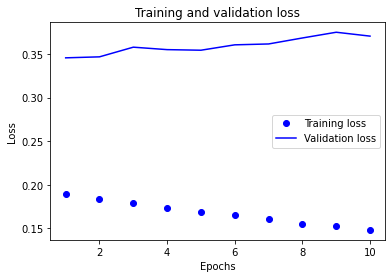

In [0]:
import matplotlib.pyplot as plt

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# 'bo' is for blue dot
plt.plot(epochs, loss, 'bo', label='Training loss')
# 'b' is for solid blue line
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

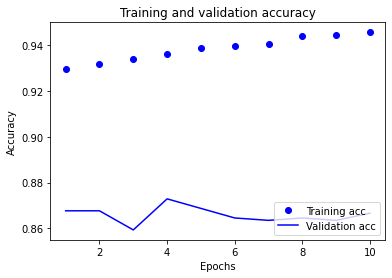

In [0]:
plt.clf()

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()
# Due to this two figures, an overfitting exists. 

#5. Basic regression: Predict fuel efficiency

In [1]:
# Use seaborn for pairplot
!pip install -q seaborn
# Use somefunctions from tensorflow_docs
!pip install -q git+https://github.com/tensorflow/docs

In [2]:
%tensorflow_version 2.x
import pathlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
print(tf.__version__)

2.2.0-rc1


In [0]:
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling
# modeling contains one class EpochDots, which changes the output of callback
# plots library is used to plot a keras-history

##5.1. Get the Auto MPG dataset

In [0]:
dataset_path = keras.utils.get_file('auto-mpg.data',
                                    'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data')
# Downloads a file from a URL if it not already in the cache.
# returns a path to the downloaded file.

In [5]:
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year', 'Origin']
raw_dataset = pd.read_csv(dataset_path, names=column_names, na_values='?', comment='\t', sep=' ', skipinitialspace=True)
# names: list of column names to use. If the file contains a header row, then you should explicitly pass header=0 to override the column names. 
# comments: Indicates remainder of lines should not be parsed. 

# Use a copied dataset not the dataset itself
dataset = raw_dataset.copy()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


##5.2. Clean the data

In [6]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [0]:
dataset = dataset.dropna()

In [8]:
# Series has map method
# The Origin column is really categorical, not numeric. So convert that to a one-hot:
dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})

# pd.get_dummies changes categorical variable into quantified variable
dataset = pd.get_dummies(dataset, prefix='', prefix_sep='')
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
393,27.0,4,140.0,86.0,2790.0,15.6,82,0,0,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,1,0,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,0,0,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,0,0,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,0,0,1


##5.3. Split the data into train and test

In [0]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

##5.4. Inspect the data

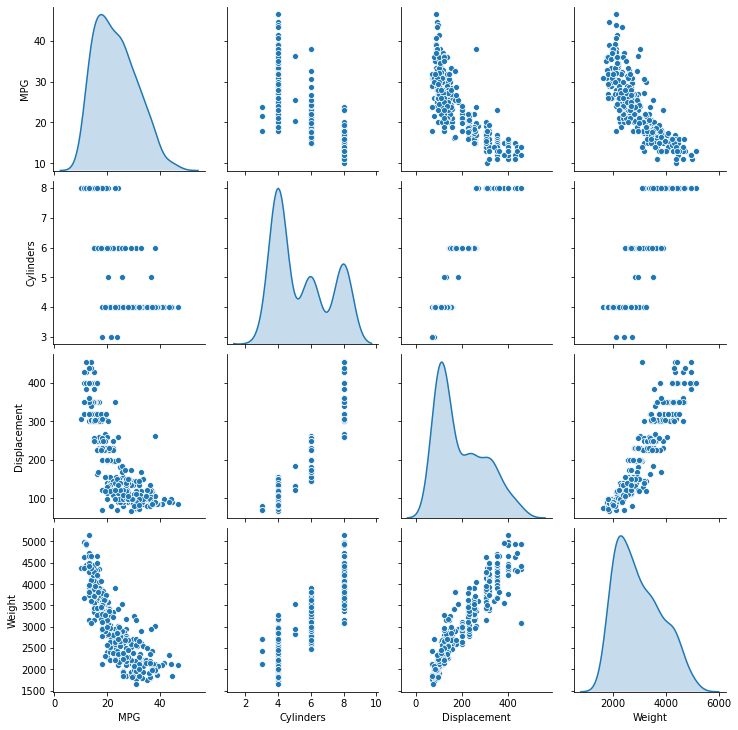

In [10]:
sns.pairplot(train_dataset[['MPG', 'Cylinders', 'Displacement', 'Weight']], diag_kind='kde')
# kernel density estimation is a non-parametric way to estimate the probability density function. 
# It is a fundamental data smoothing problem.

In [11]:
# overrall statistics:
train_stats = train_dataset.describe()
# The goal is to forecast the MPG
train_stats.pop('MPG')
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0


##5.5. Split features from labels

In [0]:
train_labels = train_dataset.pop('MPG')
test_labels = test_dataset.pop('MPG')

##5.6. Normalize the data

In [13]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)
print(normed_test_data.head())

    Cylinders  Displacement  Horsepower  ...    Europe     Japan       USA
9    1.483887      1.865988    2.234620  ... -0.465148 -0.495225  0.774676
25   1.483887      1.578444    2.890853  ... -0.465148 -0.495225  0.774676
28   1.483887      1.041693    2.313368  ... -0.465148 -0.495225  0.774676
31  -0.869348     -0.789008   -0.259066  ... -0.465148  2.012852 -1.286751
33   0.307270      0.351586   -0.127819  ... -0.465148 -0.495225  0.774676

[5 rows x 9 columns]


##5.7. Build the model

In [0]:
def build_model():
  model = keras.Sequential([
                            layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
                            layers.Dense(64, activation='relu'),
                            layers.Dense(1)
  ])
  # learnrate
  optimizer = tf.keras.optimizers.RMSprop(0.001)
  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [0]:
model = build_model()

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                640       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


In [17]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[-0.18490097],
       [-0.05042512],
       [-0.00114723],
       [-0.20023428],
       [ 0.13159446],
       [-0.005521  ],
       [ 0.15630634],
       [ 0.14725174],
       [-0.07208842],
       [ 0.1327641 ]], dtype=float32)

##5.8. Train the model

In [18]:
EPOCHS = 1000
history = model.fit(normed_train_data, train_labels, epochs=EPOCHS, validation_split=0.2, verbose=0, callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, loss:566.9787,  mae:22.5508,  mse:566.8142,  val_loss:559.1040,  val_mae:22.3598,  val_mse:559.3687,  
....................................................................................................
Epoch: 100, loss:6.0632,  mae:1.7271,  mse:6.0163,  val_loss:8.3800,  val_mae:2.1356,  val_mse:8.3780,  
....................................................................................................
Epoch: 200, loss:5.3819,  mae:1.5758,  mse:5.3357,  val_loss:8.3346,  val_mae:2.1229,  val_mse:8.3319,  
....................................................................................................
Epoch: 300, loss:4.8488,  mae:1.5035,  mse:4.8916,  val_loss:8.1268,  val_mae:2.2171,  val_mse:8.1129,  
....................................................................................................
Epoch: 400, loss:4.4475,  mae:1.4066,  mse:4.4836,  val_loss:8.4062,  val_mae:2.2324,  val_mse:8.3868,  
..............................................................

In [19]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,2.270889,0.950887,2.284390,8.560656,2.234049,8.522703,995
996,2.371228,0.999838,2.398497,8.474513,2.231042,8.436678,996
997,2.431597,1.008420,2.428986,8.548087,2.230204,8.504741,997
998,2.401227,0.960226,2.407742,8.379318,2.214401,8.339076,998
999,2.498350,0.991073,2.498386,8.153467,2.168918,8.117579,999


Text(0, 0.5, 'MAE [MPG]')

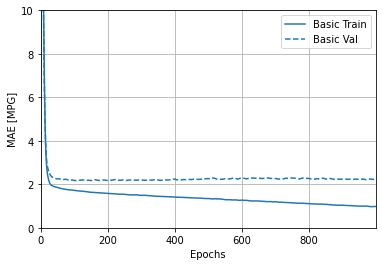

In [21]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)
plotter.plot({'Basic': history}, metric='mae')
plt.ylim([0, 10])
plt.ylabel('MAE [MPG]')

Text(0, 0.5, 'MSE [MPG^2]')

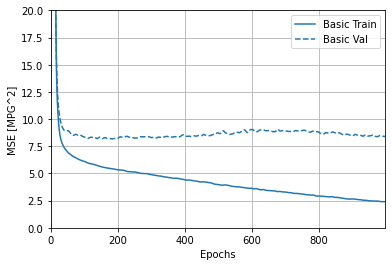

In [24]:
plotter.plot({'Basic': history}, metric='mse')
plt.ylim([0, 20])
plt.ylabel('MSE [MPG^2]')

In [25]:
# EarlyStopping callback when the validation score doesn't improve
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

early_history = model.fit(normed_train_data, train_labels, epochs=EPOCHS, validation_split=0.2, verbose=0, callbacks=[early_stop, tfdocs.modeling.EpochDots()])
# What is a callback in keras?
# A callback is a set of functions to be applied at given stages of the training procedure. You can use callbacks to get a view on internal states and statistics of the model during training.

# Popular used callback functions/classes:
# BaseLogger: Callback that accumulates epoch averages of metrics.
# TerminateOnNaN: Callback that terminates training when a NaN loss is encountered. 
# ModelCheckpoint: Save the model after every epoch. 
# EarlyStopping: Stop training when a monitored quantity has stopped improving.
# RemoteMonitor: Callback used to stream events to a server.
# ReduceLROnPlateau: Reduce learning rate when a metric has stopped improving. 
# CSVLogger: Callback that streams epoch results to a csv file.


Epoch: 0, loss:541.2281,  mae:22.0401,  mse:544.4558,  val_loss:528.0929,  val_mae:21.6015,  val_mse:528.3572,  
........................................................................

Text(0, 0.5, 'MAE [MPG]')

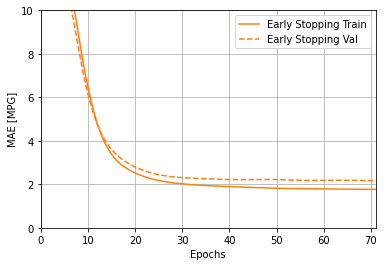

In [26]:
plotter.plot({'Early Stopping': early_history}, metric='mae')
plt.ylim([0, 10])
plt.ylabel('MAE [MPG]')

In [27]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)
print('Testing set Mean Abs Error: {:5.2f} MPG'.format(mae))

3/3 - 0s - loss: 6.2910 - mae: 1.8956 - mse: 5.8905
Testing set Mean Abs Error:  1.90 MPG


##5.9. Make predictions

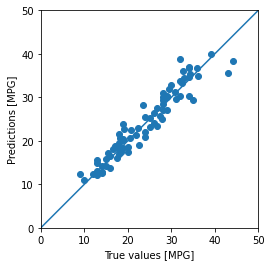

In [29]:
test_predictions = model.predict(normed_test_data).flatten() # return a copy of the array collapsed into one dimension
a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

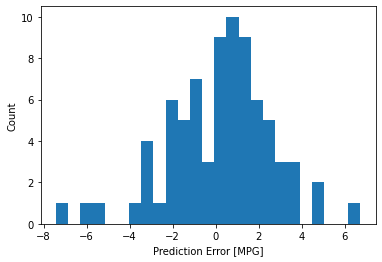

In [30]:
# Error distribution
error = test_predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [MPG]')
_ = plt.ylabel('Count')
# it's not quite gaussian, but we might expect that because the number of samples is very small. 